In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
df = pd.read_csv("german_credit_data.csv")

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


<AxesSubplot:>

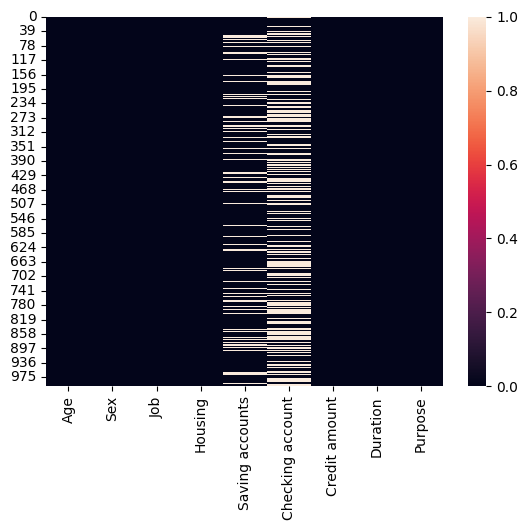

In [319]:
sns.heatmap(df.isnull())

## missing data

In [320]:
df.describe().transpose()

count      mean          std    min     25%     50%      75%  \
Age            1000.0    35.546    11.375469   19.0    27.0    33.0    42.00   
Job            1000.0     1.904     0.653614    0.0     2.0     2.0     2.00   
Credit amount  1000.0  3271.258  2822.736876  250.0  1365.5  2319.5  3972.25   
Duration       1000.0    20.903    12.058814    4.0    12.0    18.0    24.00   

                   max  
Age               75.0  
Job                3.0  
Credit amount  18424.0  
Duration          72.0

In [321]:
df["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [322]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

<AxesSubplot:xlabel='Checking account', ylabel='Age'>

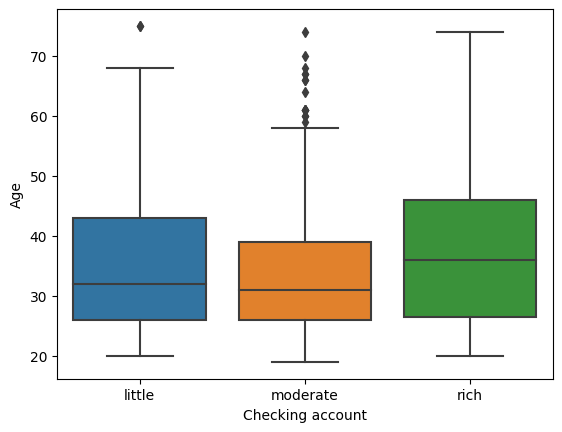

In [323]:
sns.boxplot(x = "Checking account", y = "Age", data = df)

In [324]:
def replaceMissingBankAccount(colms):
    Age = colms[0]
    Checking = colms[1]
    
    if pd.isnull(Checking):
        if (Age >= 42) & (Age < 45):
            return "little"
        elif Age <= 40:
            return "moderate"
        else:
            return "rich"
    else:
        return Checking

In [325]:
df

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little              NaN           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little              NaN           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little              NaN            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              Purpose  
0           6             radio/TV  
1          48             radio/TV  
2          12            education  
3          42  furniture/equipment  
4          24                  car  
..        ...                  ...  
995        12  furniture/equipment  
996        30                  car  
997        12             radio/TV  
998        45             radio/TV  
999        45                  car  

[1000 rows x 9 columns]

In [326]:
df["Checking account"] = df[["Age", "Checking account"]].apply(replaceMissingBankAccount, axis=1)

<AxesSubplot:xlabel='Saving accounts', ylabel='Age'>

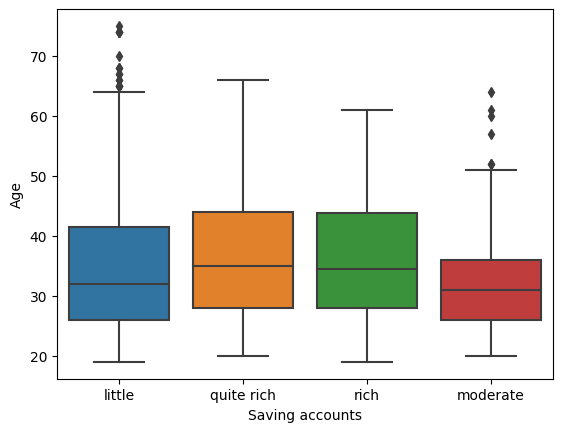

In [327]:
sns.boxplot(x = "Saving accounts", y = "Age", data = df)

In [328]:
df.groupby("Saving accounts").median()

Age  Job  Credit amount  Duration
Saving accounts                                    
little           32.0  2.0         2238.0      18.0
moderate         31.0  2.0         2463.0      21.0
quite rich       35.0  2.0         2326.0      15.0
rich             34.5  2.0         1587.0      18.0

In [329]:
def replaceMissingSavingaBankAccount(colms):
    Age = colms[0]
    Savings = colms[1]
    
    if pd.isnull(Savings):
        if (Age >= 32) & (Age <= 34):
            return "little"
        elif (Age >= 31) & (Age >32):
            return "moderate"
        elif (Age >= 35):
            return "quite rich"
        else:
            return "rich"
    else:
        return Savings

In [330]:
df["Saving accounts"] = df[["Age", "Saving accounts"]].apply(replaceMissingSavingaBankAccount, axis=1)

<AxesSubplot:>

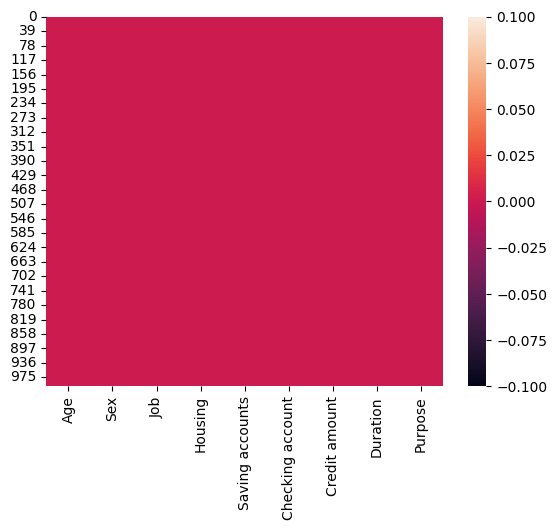

In [331]:
sns.heatmap(df.isnull())

In [332]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

In [333]:
housing = pd.get_dummies(df["Housing"], drop_first=True)

In [334]:
df = pd.concat([df, housing], axis=1)

In [335]:
df.drop("Housing", axis=1, inplace=True)

In [336]:
savings = pd.get_dummies(df["Saving accounts"], drop_first=True)

In [337]:
df = pd.concat([df, savings], axis=1)

In [338]:
df.drop("Saving accounts", axis=1, inplace=True)

In [339]:
df

Age  Sex  Job Checking account  Credit amount  Duration  \
0     67    1    2           little           1169         6   
1     22    0    2         moderate           5951        48   
2     49    1    1             rich           2096        12   
3     45    1    2           little           7882        42   
4     53    1    2           little           4870        24   
..   ...  ...  ...              ...            ...       ...   
995   31    0    1         moderate           1736        12   
996   40    1    3           little           3857        30   
997   38    1    2         moderate            804        12   
998   23    1    2           little           1845        45   
999   27    1    2         moderate           4576        45   

                 Purpose  own  rent  moderate  quite rich  rich  
0               radio/TV    1     0         1           0     0  
1               radio/TV    1     0         0           0     0  
2              education    1     0         0           0     0  
3    furniture/equipment    0     0         0           0     0  
4                    car    0     0         0           0     0  
..                   ...  ...   ...       ...         ...   ...  
995  furniture/equipment    1     0         0           0     0  
996                  car    1     0         0           0     0  
997             radio/TV    1     0         0           0     0  
998             radio/TV    0     0         0           0     0  
999                  car    1     0         1           0     0  

[1000 rows x 12 columns]

In [340]:
checking = pd.get_dummies(df["Checking account"], drop_first=True)

In [341]:
df = pd.concat([df, checking], axis=1)

In [342]:
df.drop("Checking account", axis=1, inplace=True)

In [343]:
df["Purpose"].nunique()

8

In [344]:
purpose = pd.get_dummies(df["Purpose"], drop_first=True)

In [345]:
df = pd.concat([df, purpose], axis=1)

In [346]:
df.drop("Purpose", axis=1, inplace=True)

In [347]:
df

Age  Sex  Job  Credit amount  Duration  own  rent  moderate  quite rich  \
0     67    1    2           1169         6    1     0         1           0   
1     22    0    2           5951        48    1     0         0           0   
2     49    1    1           2096        12    1     0         0           0   
3     45    1    2           7882        42    0     0         0           0   
4     53    1    2           4870        24    0     0         0           0   
..   ...  ...  ...            ...       ...  ...   ...       ...         ...   
995   31    0    1           1736        12    1     0         0           0   
996   40    1    3           3857        30    1     0         0           0   
997   38    1    2            804        12    1     0         0           0   
998   23    1    2           1845        45    0     0         0           0   
999   27    1    2           4576        45    1     0         1           0   

     rich  moderate  rich  car  domestic appliances  education  \
0       0         0     0    0                    0          0   
1       0         1     0    0                    0          0   
2       0         0     1    0                    0          1   
3       0         0     0    0                    0          0   
4       0         0     0    1                    0          0   
..    ...       ...   ...  ...                  ...        ...   
995     0         1     0    0                    0          0   
996     0         0     0    1                    0          0   
997     0         1     0    0                    0          0   
998     0         0     0    0                    0          0   
999     0         1     0    1                    0          0   

     furniture/equipment  radio/TV  repairs  vacation/others  
0                      0         1        0                0  
1                      0         1        0                0  
2                      0         0        0                0  
3                      1         0        0                0  
4                      0         0        0                0  
..                   ...       ...      ...              ...  
995                    1         0        0                0  
996                    0         0        0                0  
997                    0         1        0                0  
998                    0         1        0                0  
999                    0         0        0                0  

[1000 rows x 19 columns]

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

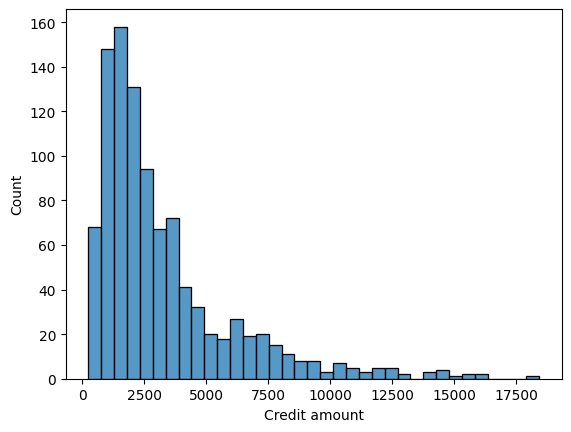

In [348]:
sns.histplot(df["Credit amount"])

In [349]:
target ="Credit amount"

In [350]:
X = df.drop(target, axis=1).values
y = df[target].values

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [352]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [353]:
scalar = MinMaxScaler()

In [354]:
X_train = scalar.fit_transform(X_train)

In [355]:
X_test = scalar.transform(X_test)

In [356]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [357]:
stop = EarlyStopping(patience=50)

In [358]:
X_train.shape

(700, 18)

In [359]:
model = Sequential()
model.add(Dense(units=520, activation="relu"))
model.add(Dense(units=320, activation="relu"))
model.add(Dense(units=300, activation="relu"))
model.add(Dense(units=300, activation="relu"))
model.add(Dense(units=150, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=18, activation="relu"))

model.add(Dense(units=1, activation="relu"))

model.compile(loss = "mse", optimizer = "adam")

In [360]:
model.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test), callbacks = [stop])

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 [==============================] - 2s 2ms/sample - loss: 20130099.1886 - val_loss: 12399675.6533
Epoch 2/150
700/700 [==============================] - 1s 1ms/sample - loss: 11650668.9629 - val_loss: 6227640.1733
Epoch 3/150
700/700 [==============================] - 1s 1ms/sample - loss: 8214870.3886 - val_loss: 4914275.4333
Epoch 4/150
700/700 [==============================] - 1s 1ms/sample - loss: 7217717.7686 - val_loss: 4967107.8800
Epoch 5/150
700/700 [==============================] - 1s 1ms/sample - loss: 6355811.6457 - val_loss: 4398584.7967
Epoch 6/150
700/700 [==============================] - 1s 954us/sample - loss: 6036120.0386 - val_loss: 3622707.5967
Epoch 7/150
700/700 [==============================] - 1s 932us/sample - loss: 5423482.2257 - val_loss: 3412303.3633
Epoch 8/150
700/700 [==============================] - 1s 966us/sample - loss: 4928687.7343 - val_loss: 3514818.6767
Epoch 9/150
700/700 [====

700/700 [==============================] - 1s 954us/sample - loss: 2106504.9550 - val_loss: 3975020.1400


<AxesSubplot:>

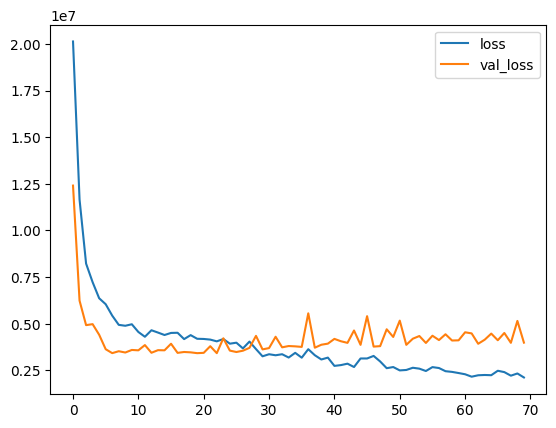

In [361]:
pd.DataFrame(model.history.history).plot()

In [362]:
predictions = model.predict(X_test)

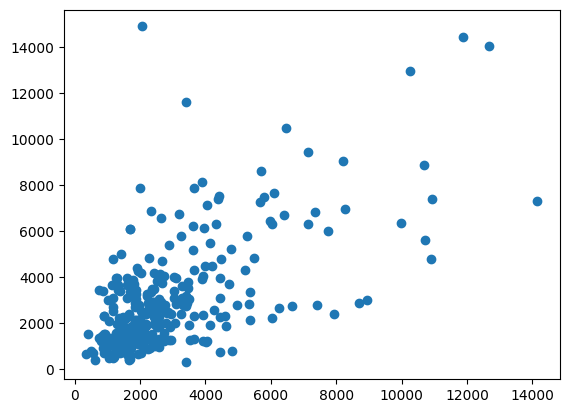

In [363]:
plt.scatter(predictions, y_test)

## Will test random samples herer

In [393]:
from random import randint
random_index = randint(0, len(df))
randomPerson = df.drop(target, axis=1).iloc[random_index]

In [394]:
X_train.shape

(700, 18)

In [395]:
randomPerson.shape

(18,)

In [396]:
randomPerson = randomPerson.values.reshape(1,18)

In [397]:
model.predict(randomPerson)

array([[12602.111]], dtype=float32)

## True

In [398]:
df.iloc[random_index]["Credit amount"] ** 2

1909924

## Will use autoencoders to see if we can improve